In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("DataEnergy_Student_V2.csv")

# Présentation du jeu de données 

In [3]:
print(df.shape)
# 10 variables et 768 données
print(df.dtypes)
df.head()

(768, 10)
Relative.compactness    float64
Surface.area            float64
Wall.area               float64
Roof.area               float64
Overall.height          float64
orientation              object
Glazing.area            float64
Glazing.area.distr        int64
Energy                  float64
Energy.efficiency        object
dtype: object


,Relative.compactness,Surface.area,Wall.area,Roof.area,Overall.height,orientation,Glazing.area,Glazing.area.distr,Energy,Energy.efficiency
0,0.982928,530.489958,306.484593,112.002683,7.0,North,0.016095,0,34.263943,B
1,0.983547,519.872380,299.776324,110.048028,7.0,East,-0.009387,0,34.589751,B
2,0.979453,516.191221,303.374358,106.408431,7.0,South,-0.000697,0,38.778048,C
3,0.977733,518.924089,292.812213,113.055938,7.0,West,0.000010,0,37.947808,C
4,0.903029,552.968920,316.236102,118.366409,7.0,North,-0.006592,0,47.675859,D


In [4]:
df["orientation"]=pd.Categorical(df["orientation"])
df["Energy.efficiency"] = pd.Categorical(df["Energy.efficiency"])
#df["Overall.height"]=pd.Categorical(df["Overall.height"])
df["Glazing.area.distr"]=pd.Categorical(df["Glazing.area.distr"])
print(df.dtypes)
df.describe()

Relative.compactness     float64
Surface.area             float64
Wall.area                float64
Roof.area                float64
Overall.height           float64
orientation             category
Glazing.area             float64
Glazing.area.distr      category
Energy                   float64
Energy.efficiency       category
dtype: object


,Relative.compactness,Surface.area,Wall.area,Roof.area,Overall.height,Glazing.area,Energy
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764511,671.349569,318.331811,176.508879,5.25000,0.234347,46.923575
std,0.105914,88.216217,43.942031,45.206368,1.75114,0.133144,19.863003
min,0.612496,501.450033,234.338121,105.338876,3.50000,-0.024009,10.211493
25%,0.677856,598.684672,291.800051,137.385287,3.50000,0.103055,29.360416
50%,0.751687,673.069405,315.761457,183.308441,5.25000,0.247521,41.761247
75%,0.835044,744.594128,342.981089,220.510532,7.00000,0.391185,64.327196
max,0.991210,825.950839,425.805165,225.757721,7.00000,0.427021,94.842601


# Analyse unidimensionnelle des données 

West     192
South    192
North    192
East     192
Name: orientation, dtype: int64


<AxesSubplot:>

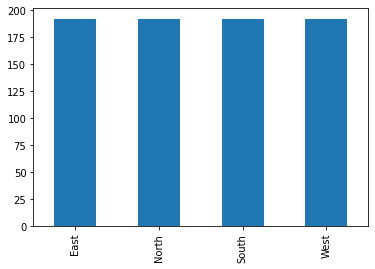

In [5]:
print(df["orientation"].value_counts())
df.orientation.value_counts(sort=False).plot(kind='bar')

<AxesSubplot:title={'center':"Fréquences des différents type d'énergies"}, xlabel='freq', ylabel='Energy.efficiency'>

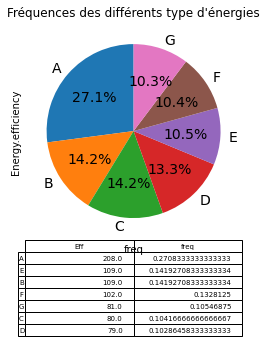

In [6]:
from pandas.plotting import table
Eff = df["Energy.efficiency"].value_counts()
df2 = pd.DataFrame( index = ['A', 'E', 'B', 'F', 'G', 'C', 'D'], columns = ['Eff'])
df2["Eff"] = Eff
df2["freq"]=Eff/len(df)
ax1 = plt.subplot(111, aspect='equal')
plt.title("Fréquences des différents type d'énergies")
plt.xlabel("freq")

df["Energy.efficiency"].value_counts().plot(kind='pie',y = 'Freq' ,ax = ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=['A','B','C',"D","E","F","G"] ,legend = False, fontsize=14,table=df2)



In [7]:
Eff = df["Energy.efficiency"].value_counts()
df2 = pd.DataFrame( index = ['A', 'E', 'B', 'F', 'G', 'C', 'D'], columns = ['Eff'])
df2["Eff"] = Eff
df2["freq"]=Eff/len(df)
print("ouai" ,df2)

pd.pivot_table(df2,index=df2.index)

ouai    Eff      freq
A  208  0.270833
E  109  0.141927
B  109  0.141927
F  102  0.132812
G   81  0.105469
C   80  0.104167
D   79  0.102865


,Eff,freq
A,208,0.270833
B,109,0.141927
C,80,0.104167
D,79,0.102865
E,109,0.141927
F,102,0.132812
G,81,0.105469


<AxesSubplot:>

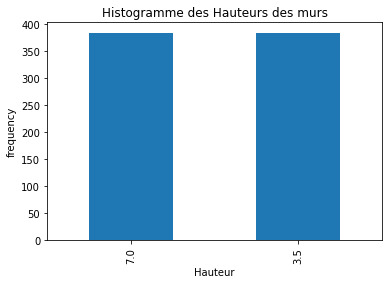

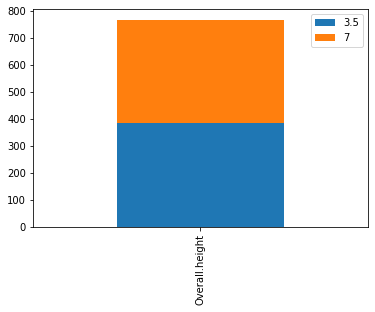

In [8]:
plt.title("Histogramme des Hauteurs des murs")
plt.xlabel("Hauteur")
plt.ylabel("frequency")
df["Overall.height"].value_counts(sort=False).plot.bar(stacked=True)
aux = pd.Categorical(df["Overall.height"])
df3 = pd.DataFrame(aux.value_counts()[0],index=['Overall.height'],columns = ['3.5'])
df3["3.5"]= aux.value_counts()[0]
df3["7"]= aux.value_counts()[1]

plt.ylabel("frequency")
df3.plot.bar(stacked=True)

5    144
4    144
3    144
2    144
1    144
0     48
Name: Glazing.area.distr, dtype: int64


Text(0, 0.5, 'Prop')

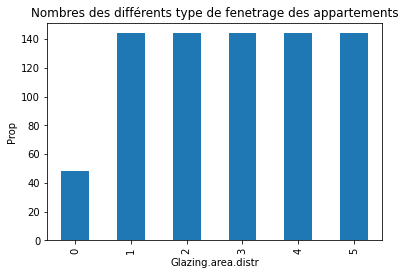

In [9]:
print(df["Glazing.area.distr"].value_counts(),)
df["Glazing.area.distr"].value_counts(sort=False).plot(kind='bar')
plt.title("Nombres des différents type de fenetrage des appartements")
plt.xlabel("Glazing.area.distr")
plt.ylabel("Prop")

In [10]:
aux = [i for i in range (len(df)) if df["Glazing.area.distr"][i]==0]
df.iloc[aux, df.columns.get_loc("Glazing.area")]=0
#df["Glazing.area"].plot(kind='box')
#plt.show()
#df["Glazing.area"].plot(kind='hist',bins=np.arange(0.0,0.6,0.1))

In [11]:
#print(df["Relative.compactness"].describe())
#df["Relative.compactness"].plot(kind='hist')
#plt.show()
#df["Relative.compactness"].plot(kind='box')

In [12]:
#print(df["Surface.area"].describe())
#df["Surface.area"].plot(kind='hist')
#plt.show()
#df["Surface.area"].plot(kind='box')

count    768.000000
mean       0.764511
std        0.105914
min        0.612496
25%        0.677856
50%        0.751687
75%        0.835044
max        0.991210
Name: Relative.compactness, dtype: float64


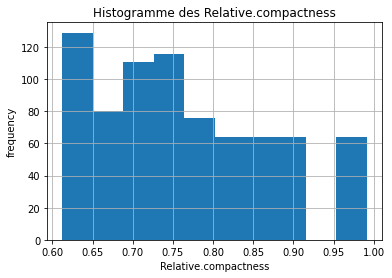

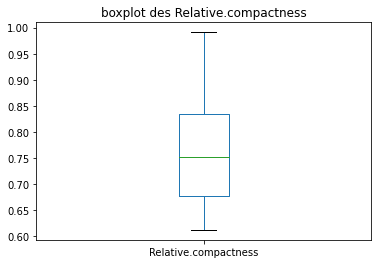

count    768.000000
mean     671.349569
std       88.216217
min      501.450033
25%      598.684672
50%      673.069405
75%      744.594128
max      825.950839
Name: Surface.area, dtype: float64


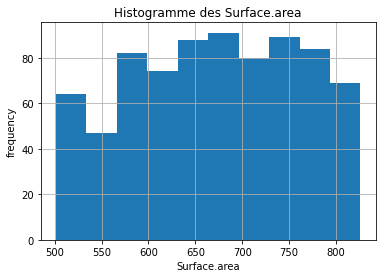

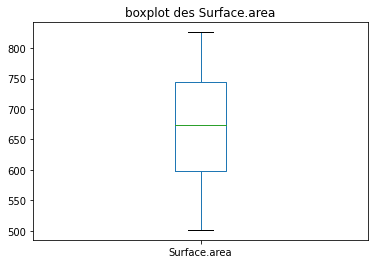

count    768.000000
mean     318.331811
std       43.942031
min      234.338121
25%      291.800051
50%      315.761457
75%      342.981089
max      425.805165
Name: Wall.area, dtype: float64


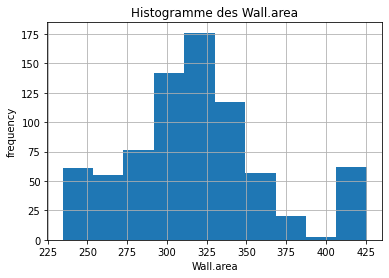

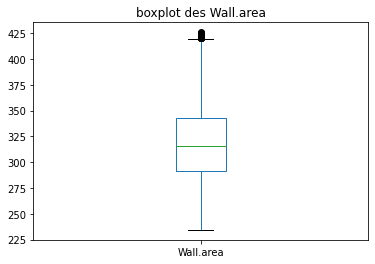

count    768.000000
mean     176.508879
std       45.206368
min      105.338876
25%      137.385287
50%      183.308441
75%      220.510532
max      225.757721
Name: Roof.area, dtype: float64


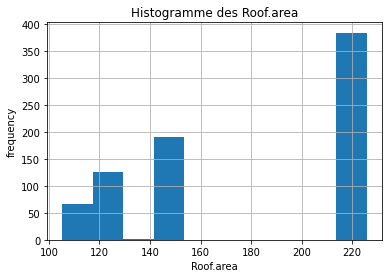

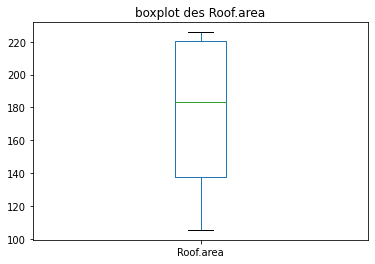

count    768.00000
mean       5.25000
std        1.75114
min        3.50000
25%        3.50000
50%        5.25000
75%        7.00000
max        7.00000
Name: Overall.height, dtype: float64


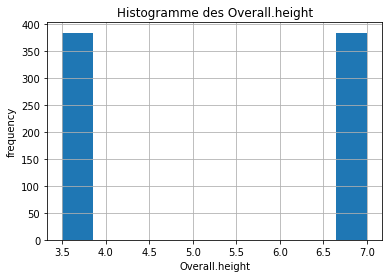

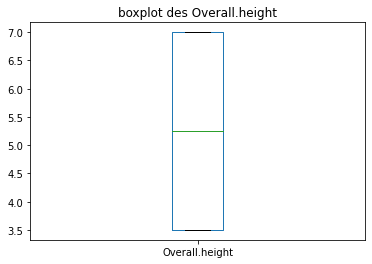

count    768.000000
mean       0.234362
std        0.133103
min        0.000000
25%        0.103055
50%        0.247521
75%        0.391185
max        0.427021
Name: Glazing.area, dtype: float64


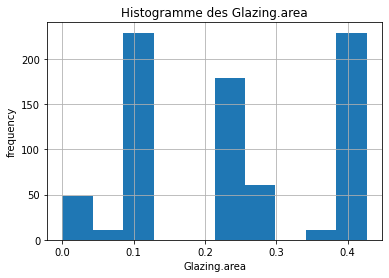

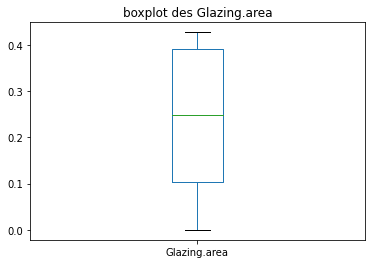

count    768.000000
mean      46.923575
std       19.863003
min       10.211493
25%       29.360416
50%       41.761247
75%       64.327196
max       94.842601
Name: Energy, dtype: float64


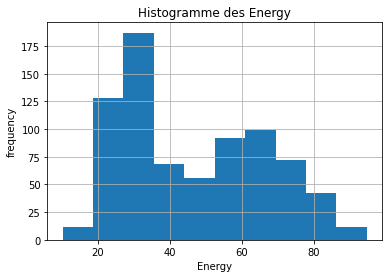

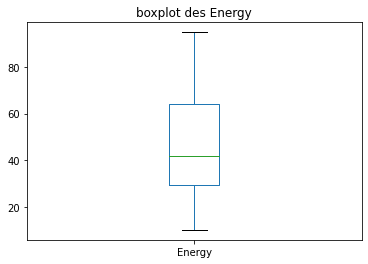

In [13]:
quanti = df.columns.drop(["orientation","Energy.efficiency",'Glazing.area.distr'])
quanti.index = quanti
quali =  df[["orientation","Energy.efficiency",'Glazing.area.distr']].columns
for stri in quanti:
    print(df[stri].describe())
    df[stri].hist()
    plt.title("Histogramme des " + stri)
    plt.xlabel(stri)
    plt.ylabel("frequency")
    plt.show()
    df[stri].plot(kind='box')
    plt.title("boxplot des " + stri)
    plt.show()

# Analyse bidimensionnelle des données 

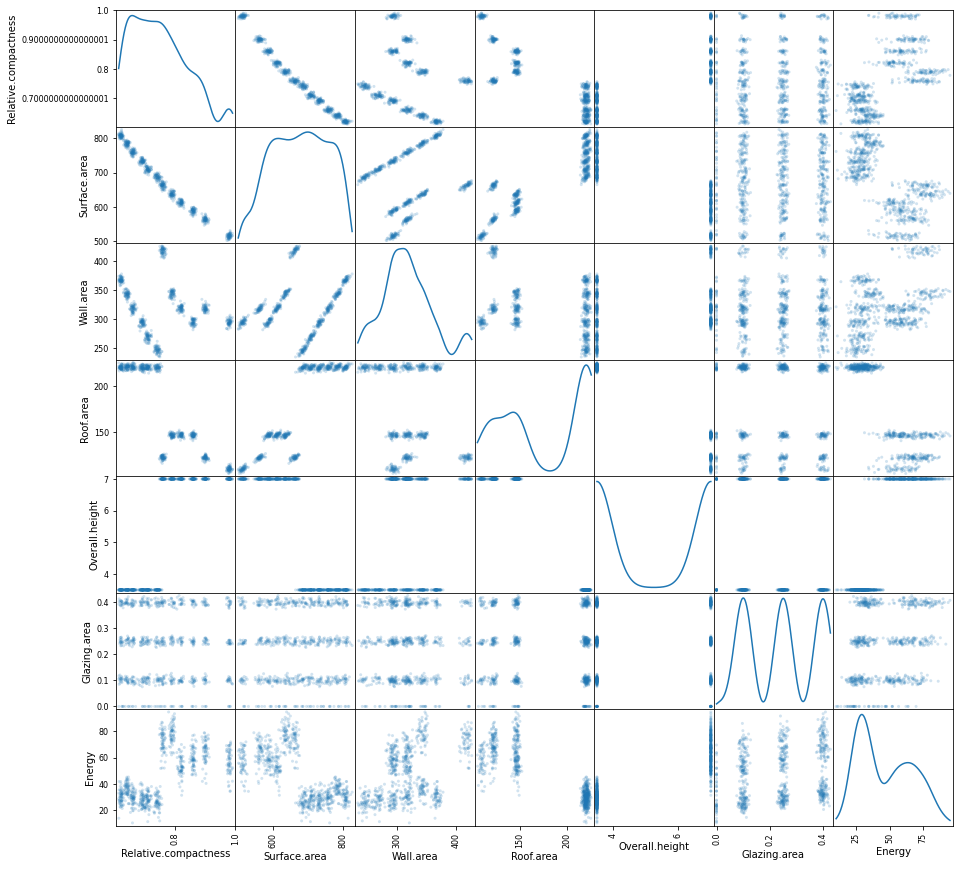

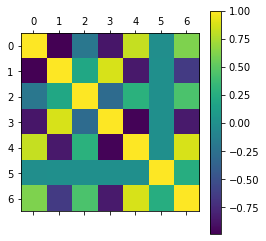

In [14]:
#AVEC PANDAS
pd.plotting.scatter_matrix(df[quanti], alpha=0.2, figsize=(15, 15), diagonal='kde')

plt.show()
plt.matshow(df.corr())

plt.colorbar()

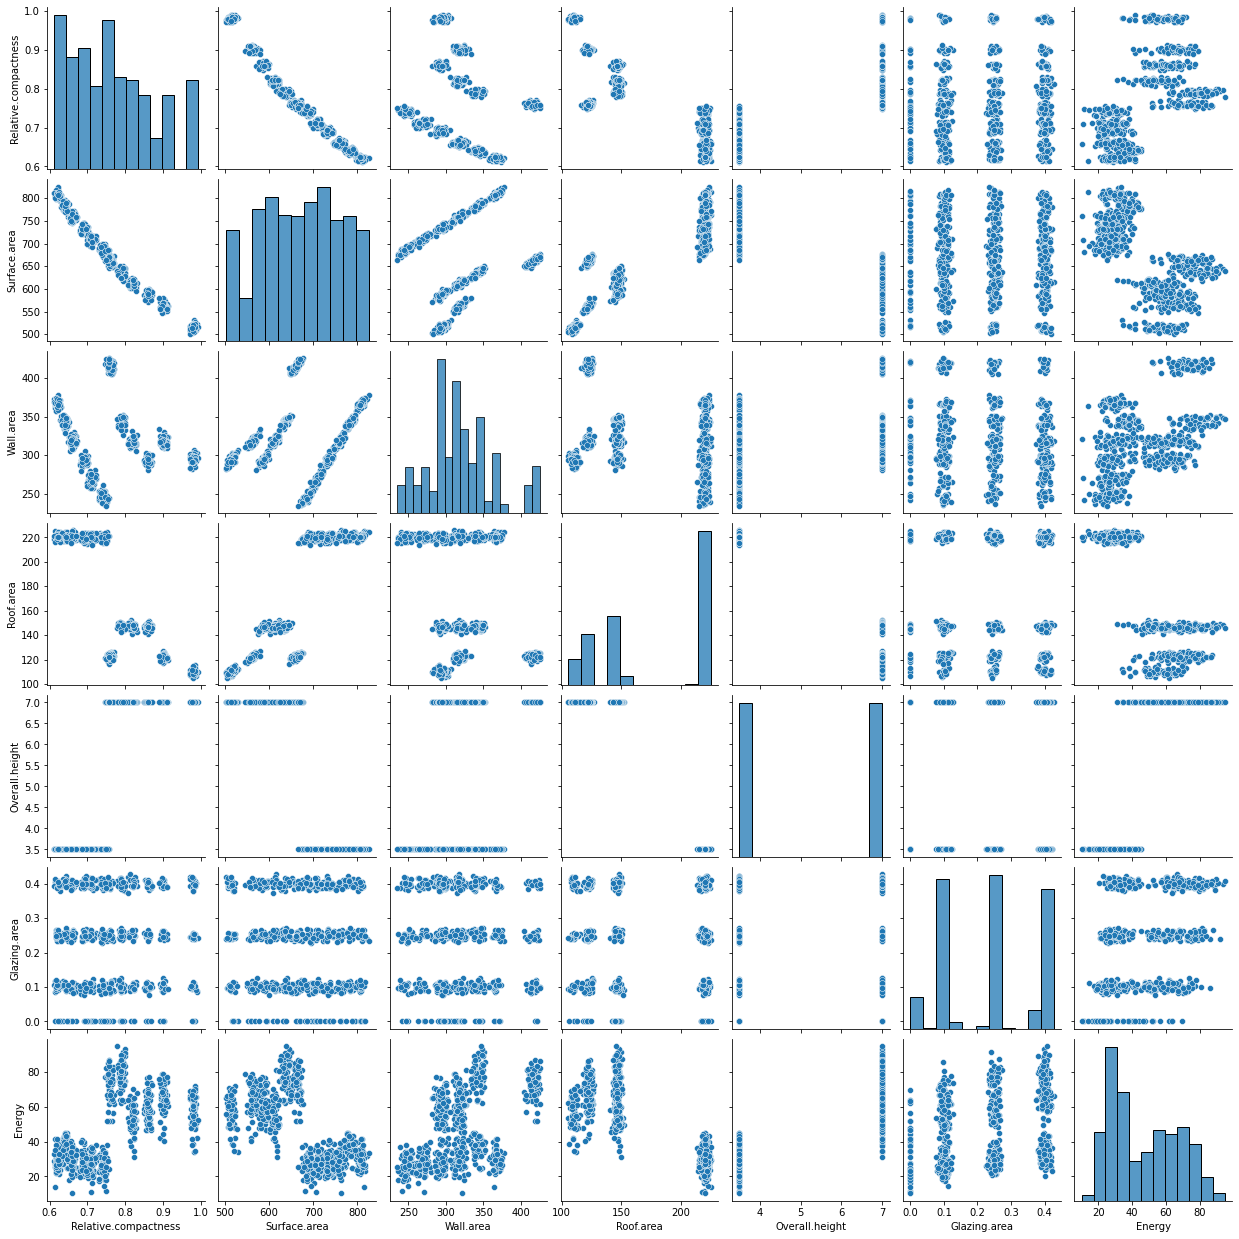

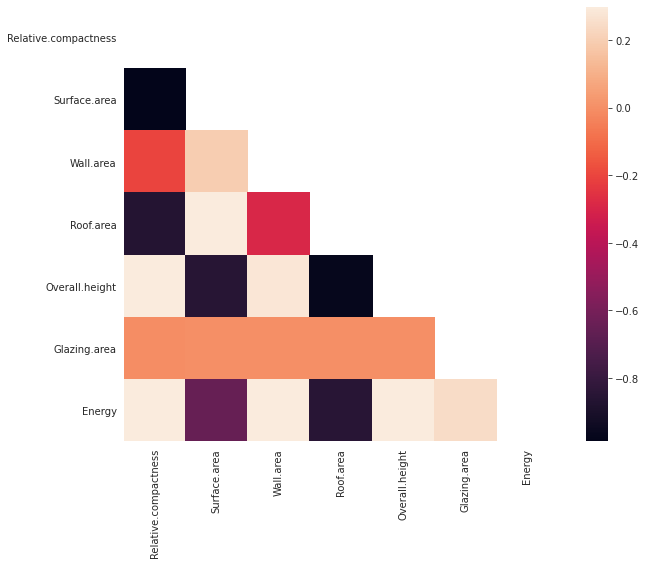

In [15]:
#avec seaborn 
sns.pairplot(df)
plt.show()

corr = df.corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(10, 8))

    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [16]:
#Transformation glazing.are.distr
df["Glazing.area.distr"].where(df["Glazing.area.distr"] == 0,1,inplace =True)

df["Glazing.area.distr"]=pd.Categorical(list(df["Glazing.area.distr"]))
quanti = df.columns.drop(["orientation","Energy.efficiency",'Glazing.area.distr'])
quali =  df[["orientation","Energy.efficiency",'Glazing.area.distr']].columns

# Clustering 

## ACP 

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# réduction des variables
X=scale(df[quanti.drop("Energy")] )


In [18]:
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)

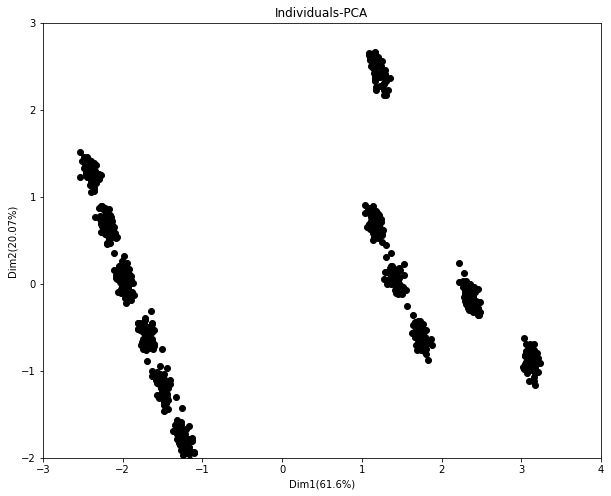

In [19]:
plt.figure(figsize=(10,8))
for i, j in zip(C[:,0], C[:,1]):
    plt.plot(i, j, "o",color="black")
plt.axis((-3,4,-2,3))
plt.title("Individuals-PCA")
plt.ylabel("Dim2(20.07%)")
plt.xlabel("Dim1(61.6%)")
plt.show()

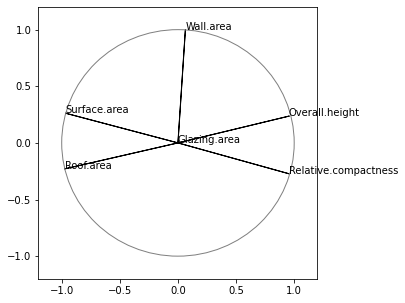

In [20]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, df[quanti].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

In [21]:
from sklearn.cluster  import  KMeans
from  sklearn.metrics  import confusion_matrix
clust=KMeans(n_clusters=2)
clust.fit(X)
classe=clust.labels_

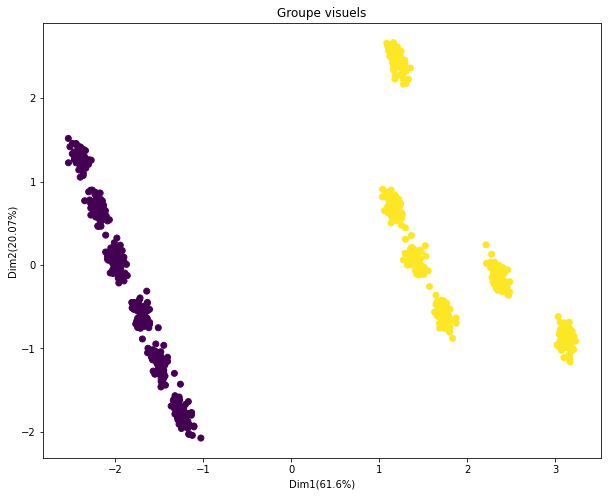

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(C[:,0], C[:,1], c=classe)
plt.title("Groupe visuels")
plt.ylabel("Dim2(20.07%)")
plt.xlabel("Dim1(61.6%)")
plt.show()

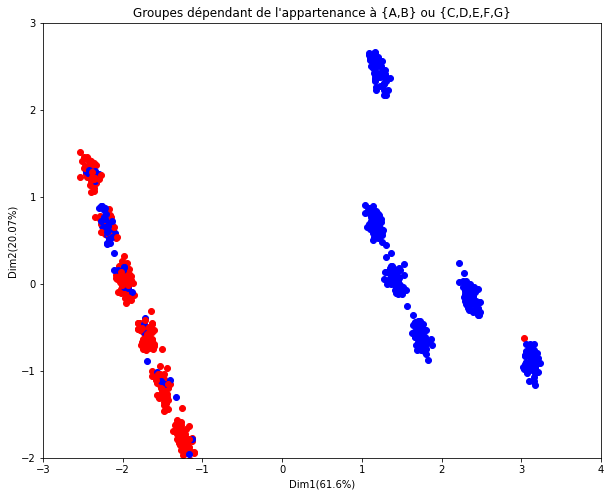

In [23]:
plt.figure(figsize=(10,8))
for i, j, k in zip(C[:,0], C[:,1],df["Energy.efficiency"]):
    color = "red" if k=="A" or k =="B"  else "blue"
    plt.plot(i, j, "o",color=color)
plt.axis((-3,4,-2,3))
plt.title("Groupes dépendant de l'appartenance à {A,B} ou {C,D,E,F,G}")

plt.ylabel("Dim2(20.07%)")
plt.xlabel("Dim1(61.6%)")
plt.show()

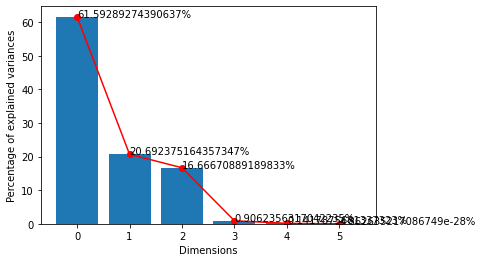

In [24]:
## Décroissance de la variance expliquée
X = np.arange(pca.explained_variance_ratio_.size)
plt.bar(X,100 * pca.explained_variance_ratio_)
PCA()
plt.plot(X,100 * pca.explained_variance_ratio_,"o",ls= "-",color = "red",)
plt.xlabel("Dimensions")
plt.ylabel("Percentage of explained variances")
for i in range (len(pca.explained_variance_ratio_)):  
    plt.text(X[i],100 * pca.explained_variance_ratio_[i],str(100 * pca.explained_variance_ratio_[i]) + "%")
plt.show()


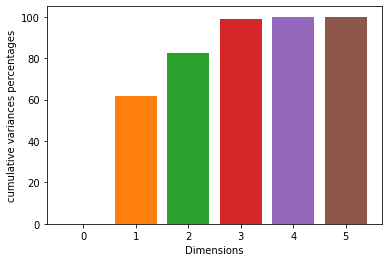

In [25]:
plt.xlabel("Dimensions")
plt.ylabel("cumulative variances percentages")
for i in range (len(pca.explained_variance_ratio_)):  
    plt.bar(X[i],100 * sum(pca.explained_variance_ratio_[:i]))
plt.show()


## Classification hierarchique

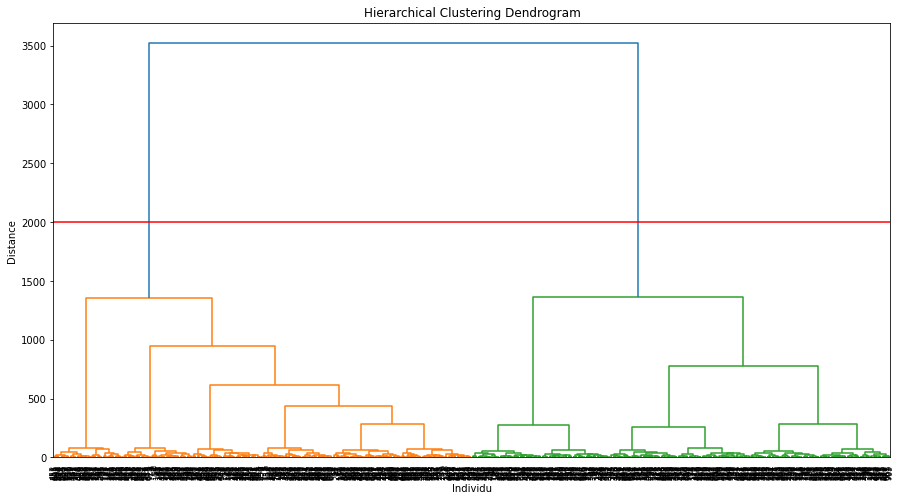

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df[quanti], 'ward')
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Individu')
plt.ylabel('Distance')
plt.axhline(y=2000, color = "red")

x= dendrogram(Z,leaf_font_size=8.)
plt.show()

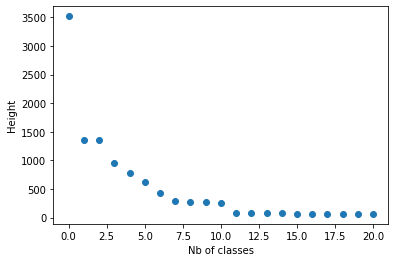

In [27]:
k = sorted(Z[:,2],reverse = True)
plt.xlabel("Nb of classes")
plt.ylabel("Height")
plt.plot(k[0:21],"o")

# Modèles linéaires 

## Régression linéaire

In [28]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as api
import statsmodels.formula.api as smf
y= df.Energy
X_quanti=df[quanti]
X_quanti =sm.add_constant(X_quanti)


#reg lin
model = sm.OLS(y, X_quanti)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.242e+31
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:46:13   Log-Likelihood:                 22249.
No. Observations:                 768   AIC:                        -4.448e+04
Df Residuals:                     761   BIC:                        -4.445e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 9.805e-13 

In [29]:

print(df.columns)
df.columns=['Relative_compactness', 'Surface_area', 'Wall_area', 'Roof_area','Overall_height', 'orientation', 'Glazing_area', 'Glazing_area_distr','Energy', 'Energy_efficiency']
X = df
y =df["Energy"]
X_quanti.columns = ["intercept",'Relative_compactness','Surface_area','Wall_area','Roof_area','Overall_height','Glazing_area','Energy']


#quanti avec interaction
mod_quanti_int = smf.ols('Energy ~ Relative_compactness+Surface_area+Wall_area+Roof_area+Overall_height+orientation+Glazing_area+Glazing_area_distr + Relative_compactness:Surface_area + Relative_compactness:Wall_area + Relative_compactness:Roof_area + Relative_compactness:Glazing_area + Surface_area:Relative_compactness + Surface_area:Wall_area + Surface_area:Roof_area + Surface_area:Glazing_area +  Wall_area:Relative_compactness + Wall_area:Surface_area + Wall_area:Roof_area + Wall_area:Glazing_area + Roof_area:Relative_compactness + Roof_area:Surface_area + Roof_area:Wall_area + Roof_area:Glazing_area + Glazing_area:Relative_compactness + Glazing_area:Surface_area + Glazing_area:Wall_area + Glazing_area:Roof_area  ', data=df).fit()

# Inspect the results
In [6]: print(mod_quanti_int.summary())



Index(['Relative.compactness', 'Surface.area', 'Wall.area', 'Roof.area',
       'Overall.height', 'orientation', 'Glazing.area', 'Glazing.area.distr',
       'Energy', 'Energy.efficiency'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     379.0
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:46:13   Log-Likelihood:                -2516.5
No. Observations:                 768   AIC:                             5069.
Df Residuals:                     750   BIC:                             5153.
Df Model:                          17                                         
Covariance Type:            nonrobust                                        

In [30]:
X_quali=pd.get_dummies(df[["orientation","Energy_efficiency","Glazing_area_distr"]])

In [31]:
mod_quanti_simplifie_int = smf.ols('Energy ~Relative_compactness + Wall_area + Roof_area + Overall_height + Glazing_area + Relative_compactness:Roof_area + Relative_compactness:Overall_height + Relative_compactness:Glazing_area + Wall_area:Roof_area + Wall_area:Overall_height + Wall_area:Glazing_area + Roof_area:Overall_height', data=df).fit()

# Inspect the results
In [6]: print(mod_quanti_simplifie_int.summary())

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     597.8
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:46:13   Log-Likelihood:                -2481.7
No. Observations:                 768   AIC:                             4989.
Df Residuals:                     755   BIC:                             5050.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [32]:
table = sm.stats.anova_lm(mod_quanti_simplifie_int,mod_quanti_int) 
print(table)

   df_resid           ssr  df_diff      ss_diff          F  Pr(>F)
0     755.0  28814.368849      0.0          NaN        NaN     NaN
1     750.0  31551.680832      5.0 -2737.311983 -13.013468     1.0


In [33]:
mod_quanti = smf.ols('Energy ~ Relative_compactness+Surface_area+Wall_area+Roof_area+Overall_height+orientation+Glazing_area+Glazing_area_distr', data=df).fit()

# Inspect the results
In [6]: print(mod_quanti.summary())

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     624.9
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:46:13   Log-Likelihood:                -2566.6
No. Observations:                 768   AIC:                             5153.
Df Residuals:                     758   BIC:                             5200.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### Sélection de variables 

In [34]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_quanti, y)
print(selector.support_)

selector.ranking_


[False  True False  True False  True  True  True]


array([4, 1, 3, 1, 2, 1, 1, 1])

In [35]:
mod_quanti_simplifie = smf.ols('Energy ~Relative_compactness  + Roof_area + Overall_height + Glazing_area ', data=df).fit()

# Inspect the results
In [6]: print(mod_quanti_simplifie.summary())

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1351.
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:46:13   Log-Likelihood:                -2582.2
No. Observations:                 768   AIC:                             5174.
Df Residuals:                     763   BIC:                             5198.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               77.6627 

In [36]:
sm.stats.anova_lm(mod_quanti_simplifie, mod_quanti)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,763.0,37440.100643,0.0,NaN,NaN,NaN
1,758.0,35941.165244,5.0,1498.935399,6.322516,0.000009


## ANCOVA 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
n= len(df)
X_new = X_quanti
X_new[X_quali.columns] = X_quali
df5 = df[['Energy', 'Relative_compactness', "Roof_area" ,"Overall_height" , "Glazing_area"]] 
Xn = X_new.drop(columns = ["Surface_area","Wall_area","orientation_East","orientation_North","orientation_West","orientation_South","Glazing_area_distr_0","Glazing_area_distr_1","Energy_efficiency_A","Energy_efficiency_B","Energy_efficiency_C","Energy_efficiency_D","Energy_efficiency_E","Energy_efficiency_F","Energy_efficiency_G","Energy"])

#ind_final = ['Energy', 'Relative_compactness', "Roof_area" ,"Overall_height" , "Glazing_area"]
#X_fin = df5[ind_final]
#X_fin.columns = ind_final

ind_final = ['Energy', 'Relative_compactness', "Roof_area" ,"Overall_height" , "Glazing_area"]
X_fin  = df5[ind_final]
X_fin.columns = ind_final
X_fin["Energy_efficiency"] = df["Energy_efficiency"] 

X_train, X_test, Y_train, Y_test = train_test_split(X_fin.drop(columns = ['Energy']),y, test_size=np.int(n*4/5))

EE_train = X_train.Energy_efficiency
EE_test =X_test.Energy_efficiency
X_train.drop(columns=["Energy_efficiency"],inplace=True)
X_test.drop(columns=["Energy_efficiency"],inplace=True)
from sklearn import linear_model
reg = LinearRegression()
reg.fit(X_train,Y_train)
prev=reg.predict(X_test)
print("MSE=",mean_squared_error(Y_test,prev))

def seuil(P):
    I = [30, 35, 45, 55, 65, 75, 100]  
    labels =["A", "B", "C", "D", "E", "F", "G"]
    n = len(P)
    pred_values =[]
    for i in range(n):
        j=0
        while(P[i]>I[j]):
            j +=1
        pred_values+=[labels[j]]
    return np.array(pred_values)
tabMLquanti = seuil(prev)
sum(tabMLquanti == EE_test)/len(EE_test)

MSE= 50.44758179772412


0.504885993485342

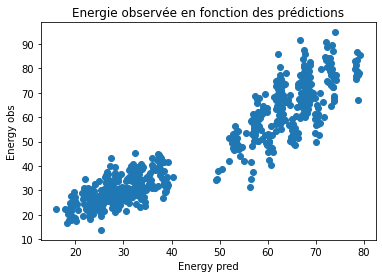

In [55]:
plt.plot(prev,Y_test,"o")
plt.xlabel(u"Energy pred")
plt.ylabel("Energy obs")
plt.title("Energie observée en fonction des prédictions")

plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
Xr_test = scaler.transform(X_test)
Yr_train =Y_train
Yr_test = Y_test

### Optimisation d'une méthode de régression

In [40]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, Yr_train)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.879718, Meilleur paramètre = {'alpha': 0.05}


In [41]:
regLassOpt=regLasso.fit(Xr_train, Yr_train)
prev=regLassOpt.predict(Xr_test)
print("MSE=",mean_squared_error(prev,Yr_test))
print("R2=",r2_score(Yr_test,prev))

MSE= 50.42572658445234
R2= 0.8683227178260344


In [43]:
mod_complet_aic = smf.ols('Energy ~ Relative_compactness+Surface_area+Wall_area+Roof_area+Overall_height+orientation+Glazing_area+Glazing_area_distr', data=df).fit()

# Inspect the results
In [6]: print(mod_complet_aic.summary())

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     624.9
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:46:15   Log-Likelihood:                -2566.6
No. Observations:                 768   AIC:                             5153.
Df Residuals:                     758   BIC:                             5200.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [44]:
mod_complet_int = smf.ols('Energy ~ orientation+  Glazing_area_distr+ Relative_compactness+ Wall_area+ Roof_area+ Overall_height+ Glazing_area + Relative_compactness:Wall_area + Relative_compactness:Roof_area + Relative_compactness:Overall_height + Relative_compactness:Glazing_area + Wall_area:Relative_compactness +  Wall_area:Roof_area + Wall_area:Overall_height + Wall_area:Glazing_area + Roof_area:Relative_compactness  + Roof_area:Wall_area + Roof_area:Overall_height + Roof_area:Glazing_area  + Overall_height:Relative_compactness  + Overall_height:Wall_area + Overall_height:Roof_area + Overall_height:Glazing_area +  Glazing_area:Relative_compactness   + Glazing_area:Wall_area + Glazing_area:Roof_area + Glazing_area:Overall_height +  Relative_compactness:orientation +  Relative_compactness:Glazing_area_distr + Wall_area:orientation +  Wall_area:Glazing_area_distr + Roof_area:orientation + Roof_area:Glazing_area_distr + Overall_height:orientation + Overall_height:Glazing_area_distr + Glazing_area:orientation + Glazing_area:Glazing_area_distr+  orientation:Glazing_area_distr + Glazing_area_distr:orientation ', data=df).fit()

# Inspect the results
In [6]: print(mod_complet_int.summary())

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     182.1
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:46:15   Log-Likelihood:                -2454.0
No. Observations:                 768   AIC:                             4992.
Df Residuals:                     726   BIC:                             5187.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [45]:
sm.stats.anova_lm(mod_complet_aic, mod_complet_int)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,758.0,35941.165244,0.0,NaN,NaN,NaN
1,726.0,26812.028180,32.0,9129.137065,7.72479,2.266818e-29


In [46]:
mod_complet = smf.ols('Energy ~  Relative_compactness+ Wall_area+ Roof_area+ Overall_height+ orientation+ Glazing_area+ Glazing_area_distr', data=df).fit()

# Inspect the results
In [6]: print(mod_complet.summary())

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     624.9
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:46:15   Log-Likelihood:                -2566.6
No. Observations:                 768   AIC:                             5153.
Df Residuals:                     758   BIC:                             5200.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [47]:
mod_complet_aic2= smf.ols('Energy ~  Relative_compactness+ Roof_area+ Overall_height+ Glazing_area+ Glazing_area_distr', data=df).fit()

mod_complet_aic2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1127.
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:46:15   Log-Likelihood:                -2567.7
No. Observations:                 768   AIC:                             5147.
Df Residuals:                     762   BIC:                             5175.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  73.3578      9.673      7.584      0.000      54.368      92.347
Glazing_area_distr[T.1]     6.2388      1.151      5.418      0.000       3.978       8.499
Relative_compactness      -78.9581      4.745    -16.639      0.000     -88.274     -69.643
Roof_area                  -0.1697      0.027     -6.370      0.000      -0.222      -0.117
Overall_height              9.6427      0.607     15.878      0.000       8.451      10.835
Glazing_area               31.6023      2.095     15.082      0.000      27.489      35.716
==============================================================================
Omnibus:                        8.822   Durbin-Watson:                   1.192
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               10.571
Skew:                           0.156   Prob(JB):                      0.00506
Kurtosis:                       3.483   Cond. No.                     7.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
sm.stats.anova_lm(mod_complet_aic2, mod_complet)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,762.0,36051.135551,0.0,NaN,NaN,NaN
1,758.0,35941.165244,4.0,109.970306,0.579819,0.677351


# Modèles linéaires Généralisés


## Régression logistique 

Text(0.5, 1.0, "Nombre d'occurence d'Energy_effciency_bis")

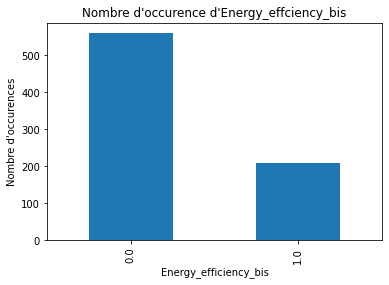

In [53]:
df["Energy_efficiency_bis"]= (df.Energy_efficiency == ("A" or "B"))
df.Energy_efficiency_bis.where(df.Energy_efficiency_bis ==0,1,inplace=True)
df.Energy_efficiency_bis.where(df.Energy_efficiency_bis == 1,0,inplace =True)
#df.Energy_efficiency_bis=pd.Categorical(df.Energy_efficiency_bis)
df.Energy_efficiency_bis.value_counts(sort=False).plot(kind="bar")
plt.xlabel("Energy_efficiency_bis")
plt.ylabel("Nombre d'occurences")
plt.title("Nombre d'occurence d'Energy_effciency_bis")


In [56]:
df_bis = df.drop(columns=["Energy","Energy_efficiency"])
df_dum = pd.get_dummies(df[["Overall_height", "orientation", "Glazing_area_distr", "Energy_efficiency_bis"]])
df_quant = df[["Relative_compactness", "Surface_area", "Wall_area","Roof_area","Glazing_area"]]
df_bis = pd.concat([df_dum, df_quant], axis = 1)
X_bis = df_bis.drop(columns=["Energy_efficiency_bis"])
X_train = X_bis[X_bis.columns]
Y_train = df_bis["Energy_efficiency_bis"].astype('int')
X_train

,Overall_height,orientation_East,orientation_North,orientation_South,orientation_West,Glazing_area_distr_0,Glazing_area_distr_1,Relative_compactness,Surface_area,Wall_area,Roof_area,Glazing_area
0,7.0,0,1,0,0,1,0,0.982928,530.489958,306.484593,112.002683,0.000000
1,7.0,1,0,0,0,1,0,0.983547,519.872380,299.776324,110.048028,0.000000
2,7.0,0,0,1,0,1,0,0.979453,516.191221,303.374358,106.408431,0.000000
3,7.0,0,0,0,1,1,0,0.977733,518.924089,292.812213,113.055938,0.000000
4,7.0,0,1,0,0,1,0,0.903029,552.968920,316.236102,118.366409,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
763,3.5,0,0,0,1,0,1,0.643870,790.290262,348.780889,220.754687,0.390400
764,3.5,0,1,0,0,0,1,0.619200,809.375965,368.120488,220.627738,0.386594
765,3.5,1,0,0,0,0,1,0.624317,813.327318,372.006715,220.660302,0.392286
766,3.5,0,0,1,0,0,1,0.624847,808.717739,367.865290,220.426225,0.397574


In [57]:
log_reg = sm.Logit(Y_train,X_train).fit()
log_reg.summary()

         Current function value: 0.249390
         Iterations: 35


/home/n7student/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     Energy_efficiency_bis   No. Observations:                  768
Model:                             Logit   Df Residuals:                      757
Method:                              MLE   Df Model:                           10
Date:                   Fri, 29 Jan 2021   Pseudo R-squ.:                  0.5730
Time:                           21:53:14   Log-Likelihood:                -191.53
converged:                         False   LL-Null:                       -448.58
Covariance Type:               nonrobust   LLR p-value:                4.295e-104
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Overall_height         -12.9205   1048.124     -0.012      0.990   -2067.205    2041.364
orientation_East     -3.717e+04        nan        nan        nan         nan         nan
orientation_North    -3.717e+04        nan        nan        nan         nan         nan
orientation_South    -3.717e+04        nan        nan        nan         nan         nan
orientation_West     -3.717e+04        nan        nan        nan         nan         nan
Glazing_area_distr_0  3.726e+04        nan        nan        nan         nan         nan
Glazing_area_distr_1  3.724e+04        nan        nan        nan         nan         nan
Relative_compactness     0.8873     15.989      0.055      0.956     -30.450      32.224
Surface_area            -0.0263        nan        nan        nan         nan         nan
Wall_area                0.0077        nan        nan        nan         nan         nan
Roof_area               -0.0208        nan        nan        nan         nan         nan
Glazing_area            -8.9388      1.138     -7.856      0.000     -11.169      -6.709
========================================================================================

Possibly complete quasi-separation: A fraction 0.53 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [58]:
df_bis = df.drop(columns=["Energy","Energy_efficiency","Overall_height","orientation","Glazing_area_distr"])
df_bis[X_quali.columns]= X_quali[X_quali.columns]
X_bis = df_bis.drop(columns=["Energy_efficiency_bis","Energy_efficiency_A","Energy_efficiency_B","Energy_efficiency_C","Energy_efficiency_D","Energy_efficiency_E","Energy_efficiency_F","Energy_efficiency_G"])
X_train = X_bis[X_bis.columns]
Y_train = df_bis["Energy_efficiency_bis"].astype('int')

log_reg = sm.Logit(Y_train,X_train).fit()
log_reg.summary()

         Current function value: 0.255318
         Iterations: 35


/home/n7student/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     Energy_efficiency_bis   No. Observations:                  768
Model:                             Logit   Df Residuals:                      758
Method:                              MLE   Df Model:                            9
Date:                   Fri, 29 Jan 2021   Pseudo R-squ.:                  0.5629
Time:                           21:53:59   Log-Likelihood:                -196.08
converged:                         False   LL-Null:                       -448.58
Covariance Type:               nonrobust   LLR p-value:                4.915e-103
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Relative_compactness   -16.6350     14.568     -1.142      0.253     -45.187      11.917
Surface_area             0.0164        nan        nan        nan         nan         nan
Wall_area               -0.0528        nan        nan        nan         nan         nan
Roof_area                0.0347        nan        nan        nan         nan         nan
Glazing_area            -8.6909      1.126     -7.716      0.000     -10.898      -6.483
orientation_East         3.8577        nan        nan        nan         nan         nan
orientation_North        3.6918        nan        nan        nan         nan         nan
orientation_South        3.3345        nan        nan        nan         nan         nan
orientation_West         3.6046        nan        nan        nan         nan         nan
Glazing_area_distr_0     8.3678        nan        nan        nan         nan         nan
Glazing_area_distr_1     6.1208        nan        nan        nan         nan         nan
========================================================================================

Possibly complete quasi-separation: A fraction 0.25 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [59]:
df_bis = df.drop(columns=["Energy","Energy_efficiency","Overall_height","orientation","Glazing_area_distr"])
df_bis[X_quali.columns]= X_quali[X_quali.columns]
X_bis = df_bis.drop(columns=["Energy_efficiency_bis","Energy_efficiency_A","Energy_efficiency_B","Energy_efficiency_C","Energy_efficiency_D","Energy_efficiency_E","Energy_efficiency_F","Energy_efficiency_G"])
X_train = X_bis[X_bis.columns]
X_train = sm.add_constant(X_train)
Y_train = df_bis["Energy_efficiency_bis"].astype('int')
X_train

,const,Relative_compactness,Surface_area,Wall_area,Roof_area,Glazing_area,orientation_East,orientation_North,orientation_South,orientation_West,Glazing_area_distr_0,Glazing_area_distr_1
0,1.0,0.982928,530.489958,306.484593,112.002683,0.000000,0,1,0,0,1,0
1,1.0,0.983547,519.872380,299.776324,110.048028,0.000000,1,0,0,0,1,0
2,1.0,0.979453,516.191221,303.374358,106.408431,0.000000,0,0,1,0,1,0
3,1.0,0.977733,518.924089,292.812213,113.055938,0.000000,0,0,0,1,1,0
4,1.0,0.903029,552.968920,316.236102,118.366409,0.000000,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,1.0,0.643870,790.290262,348.780889,220.754687,0.390400,0,0,0,1,0,1
764,1.0,0.619200,809.375965,368.120488,220.627738,0.386594,0,1,0,0,0,1
765,1.0,0.624317,813.327318,372.006715,220.660302,0.392286,1,0,0,0,0,1
766,1.0,0.624847,808.717739,367.865290,220.426225,0.397574,0,0,1,0,0,1


In [60]:
from statsmodels.discrete.discrete_model import LogitResults
df_bis = df.drop(columns=["Energy","Energy_efficiency","orientation","Glazing_area_distr"])
df_bis[X_quali.columns]= X_quali[X_quali.columns]
X_bis = df_bis.drop(columns=["Energy_efficiency_bis","Energy_efficiency_A","Energy_efficiency_B","Energy_efficiency_C","Energy_efficiency_D","Energy_efficiency_E","Energy_efficiency_F","Energy_efficiency_G"])
X_train = X_bis[X_bis.columns]
X_train = sm.add_constant(X_train)
Y_train = df["Energy_efficiency_bis"].astype('int')

log_reg = sm.Logit(Y_train,X_train).fit()
log_reg.summary()

         Current function value: 0.249391
         Iterations: 35


/home/n7student/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     Energy_efficiency_bis   No. Observations:                  768
Model:                             Logit   Df Residuals:                      756
Method:                              MLE   Df Model:                           11
Date:                   Fri, 29 Jan 2021   Pseudo R-squ.:                  0.5730
Time:                           21:54:02   Log-Likelihood:                -191.53
converged:                         False   LL-Null:                       -448.58
Covariance Type:               nonrobust   LLR p-value:                3.163e-103
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   40.2089        nan        nan        nan         nan         nan
Relative_compactness     0.8873     15.989      0.055      0.956     -30.450      32.224
Surface_area            -0.0256   1.13e+04  -2.26e-06      1.000   -2.22e+04    2.22e+04
Wall_area                0.0069   1.13e+04   6.12e-07      1.000   -2.22e+04    2.22e+04
Roof_area               -0.0223   2.26e+04  -9.89e-07      1.000   -4.43e+04    4.43e+04
Overall_height         -10.7969    164.630     -0.066      0.948    -333.465     311.872
Glazing_area            -8.9388      1.138     -7.856      0.000     -11.169      -6.709
orientation_East         8.9269        nan        nan        nan         nan         nan
orientation_North        8.6963        nan        nan        nan         nan         nan
orientation_South        8.3992        nan        nan        nan         nan         nan
orientation_West         8.5911        nan        nan        nan         nan         nan
Glazing_area_distr_0    26.0724        nan        nan        nan         nan         nan
Glazing_area_distr_1    12.5289        nan        nan        nan         nan         nan
========================================================================================

Possibly complete quasi-separation: A fraction 0.53 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [62]:
df_bis = df.drop(columns=["Energy","Energy_efficiency","Overall_height","orientation","Glazing_area_distr"])
df_bis[X_quali.columns]= X_quali[X_quali.columns]
X_bis = df_bis.drop(columns=["Energy_efficiency_bis","Energy_efficiency_A","Energy_efficiency_B","Energy_efficiency_C","Energy_efficiency_D","Energy_efficiency_E","Energy_efficiency_F","Energy_efficiency_G"])
X_train = X_bis[X_bis.columns]
X_train = sm.add_constant(X_train)
Y_train = df_bis["Energy_efficiency_bis"].astype('int')

log_reg = sm.Logit.from_formula("Energy_efficiency_bis ~ Relative_compactness+ Surface_area+ Wall_area+ Roof_area+ Glazing_area+ orientation_East+ orientation_North+ orientation_South + orientation_West+ Glazing_area_distr_0+ Glazing_area_distr_1" , data = df_bis)

# Arbres binaires de décisions

In [63]:
n= len(df)
X_new = X_quanti
X_new[X_quali.columns] = X_quali
df5 = df[['Energy', 'Relative_compactness', "Roof_area" ,"Overall_height" , "Glazing_area"]] 
Xn = X_new.drop(columns = ["Surface_area","Wall_area","orientation_East","orientation_North","orientation_West","orientation_South","Glazing_area_distr_0","Glazing_area_distr_1","Energy_efficiency_A","Energy_efficiency_B","Energy_efficiency_C","Energy_efficiency_D","Energy_efficiency_E","Energy_efficiency_F","Energy_efficiency_G","Energy"])

#ind_final = ['Energy', 'Relative_compactness', "Roof_area" ,"Overall_height" , "Glazing_area"]
#X_fin = df5[ind_final]
#X_fin.columns = ind_final

ind_final = ['Energy', 'Relative_compactness', "Roof_area" ,"Overall_height" , "Glazing_area"]
X_fin  = df5[ind_final]
X_fin.columns = ind_final
X_fin["Energy_efficiency"] = df["Energy_efficiency"] 

X_train, X_test, Y_train, Y_test = train_test_split(X_fin.drop(columns = ['Energy']),y, test_size=np.int(n*4/5))


# Random Forest

## Preparation jeux de données tests et entraînements

In [64]:
df.head()

,Relative_compactness,Surface_area,Wall_area,Roof_area,Overall_height,orientation,Glazing_area,Glazing_area_distr,Energy,Energy_efficiency,Energy_efficiency_bis
0,0.982928,530.489958,306.484593,112.002683,7.0,North,0.0,0,34.263943,B,0.0
1,0.983547,519.872380,299.776324,110.048028,7.0,East,0.0,0,34.589751,B,0.0
2,0.979453,516.191221,303.374358,106.408431,7.0,South,0.0,0,38.778048,C,0.0
3,0.977733,518.924089,292.812213,113.055938,7.0,West,0.0,0,37.947808,C,0.0
4,0.903029,552.968920,316.236102,118.366409,7.0,North,0.0,0,47.675859,D,0.0


In [65]:
df_dum = pd.get_dummies(df[["orientation", "Glazing_area_distr"]])
df_quant = df[["Overall_height", "Relative_compactness", "Surface_area", "Wall_area","Roof_area","Glazing_area"]]
dfC = pd.concat([df_dum, df_quant], axis = 1)
dfC.head()

,orientation_East,orientation_North,orientation_South,orientation_West,Glazing_area_distr_0,Glazing_area_distr_1,Overall_height,Relative_compactness,Surface_area,Wall_area,Roof_area,Glazing_area
0,0,1,0,0,1,0,7.0,0.982928,530.489958,306.484593,112.002683,0.0
1,1,0,0,0,1,0,7.0,0.983547,519.872380,299.776324,110.048028,0.0
2,0,0,1,0,1,0,7.0,0.979453,516.191221,303.374358,106.408431,0.0
3,0,0,0,1,1,0,7.0,0.977733,518.924089,292.812213,113.055938,0.0
4,0,1,0,0,1,0,7.0,0.903029,552.968920,316.236102,118.366409,0.0


In [66]:
Yr = df["Energy"]
Yc = df["Energy_efficiency"]

In [67]:
from sklearn.model_selection import train_test_split  
Xc_train,Xc_test,Yc_train,Yc_test=train_test_split(dfC,Yc,test_size=np.int(n*1/5))
Xr_train,Xr_test,Yr_train,Yr_test=train_test_split(dfC,Yr,test_size=np.int(n*1/5))

In [68]:
from sklearn.preprocessing import StandardScaler  
# L'algorithme ds réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(Xr_train)
scaler.fit(Xc_train) 
scaler.fit(Xr_test)
scaler.fit(Xc_test) 
Xr_train = scaler.transform(Xr_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(Xr_test)
Xc_train = scaler.transform(Xc_train)  
# Meme transformation sur le test
Xc_test = scaler.transform(Xc_test)

## Classification

In [69]:
from sklearn.ensemble import RandomForestClassifier 
# définition des paramètres
forest = RandomForestClassifier(n_estimators=500, 
   criterion='gini', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(Xc_train,Yc_train)
print(rfFit.oob_score_)

0.6341463414634146


In [70]:
# erreur de prévision sur le test
rfFit.score(Xc_test,Yc_test)

0.5816993464052288

Optimisation par validation croisée du nombre de variables tirés aléatoirement lors de la construction de chaque noeud.

In [71]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestClassifier(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xc_train, Yc_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.369106, Meilleur paramètre = {'max_features': 7}


In [72]:
rf= RandomForestClassifier(n_estimators=100,max_features=8)
rfFit=rf.fit(Xc_train, Yc_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xc_train.shape[1]):
    print(dfC.columns[indices[f]], importances[indices[f]])

Glazing_area 0.22849996063204764
Roof_area 0.18877806759728905
Relative_compactness 0.17547919759628847
Wall_area 0.14637145735496773
Surface_area 0.13189227953447802
Overall_height 0.0624472825947252
orientation_North 0.014693328926340028
orientation_West 0.011683044174135642
orientation_South 0.011533462334292716
orientation_East 0.010720719529222242
Glazing_area_distr_0 0.009091589989270121
Glazing_area_distr_1 0.008809609736943221


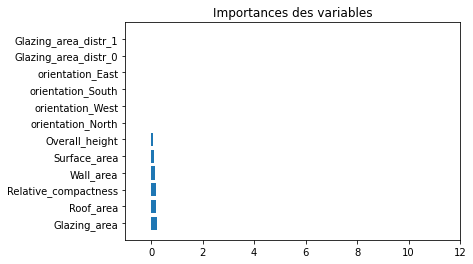

In [73]:
# Graphe des importances
plt.figure()
plt.title("Importances des variables")
plt.barh(range(Xr_train.shape[1]), importances[indices])
plt.yticks(range(Xc_train.shape[1]), dfC.columns[indices])
plt.xlim([-1, Xc_train.shape[1]])
plt.show()

## Régression

In [74]:
from sklearn.ensemble import RandomForestRegressor

# définition des paramètres
forest = RandomForestRegressor(n_estimators=500,max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(Xr_train,Yr_train)
print(rfFit.oob_score)

True


In [75]:
rfFit.score(Xr_test,Yr_test)

0.9435304339179502

In [76]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, Yr_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.056307, Meilleur paramètre = {'max_features': 7}


In [77]:
rf= RandomForestRegressor(n_estimators=100,max_features=7)
rfFit=rf.fit(Xr_train, Yr_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xr_train.shape[1]):
    print(dfC.columns[indices[f]], importances[indices[f]])

Roof_area 0.38215733286160103
Overall_height 0.27037303993054107
Surface_area 0.11213862880895505
Relative_compactness 0.09914133931303515
Glazing_area 0.06023842858471673
Wall_area 0.05381749837895886
Glazing_area_distr_1 0.009540192815111651
Glazing_area_distr_0 0.008055947612119549
orientation_East 0.0011817749294375996
orientation_South 0.0011738599795886734
orientation_North 0.0011475881932247853
orientation_West 0.001034368592709947


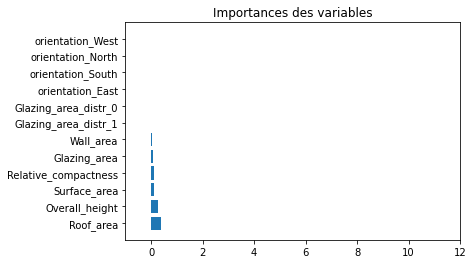

In [78]:
# Graphe des importances
plt.figure()
plt.title("Importances des variables")
plt.barh(range(Xr_train.shape[1]), importances[indices])
plt.yticks(range(Xr_train.shape[1]), dfC.columns[indices])
plt.xlim([-1, Xr_train.shape[1]])
plt.show()

# Arbres binaires de décision

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

## Classification

In [80]:
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param)
treeOpt=tree.fit(Xc_train, Yc_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.391870, Meilleur paramètre = {'max_depth': 5}


In [81]:
treeOpt.score(Xc_test,Yc_test)

0.6078431372549019

In [82]:
# prévision de l'échantillon test
y_chap = treeOpt.predict(Xc_test)
# matrice de confusion
table=pd.crosstab(y_chap,Yc_test)
print(table)

Energy_efficiency   A   B  C   D   E  F   G
row_0                                      
A                  24   4  3   0   0  0   0
B                  10  14  5   0   0  0   0
C                   1   5  7   1   0  0   0
D                   0   0  0  16   5  0   0
E                   0   0  0   2  12  8   0
F                   0   0  0   0   5  9  11
G                   0   0  0   0   0  0  11


In [83]:
treeG=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(Xc_train,Yc_train)

DecisionTreeClassifier(max_depth=5)

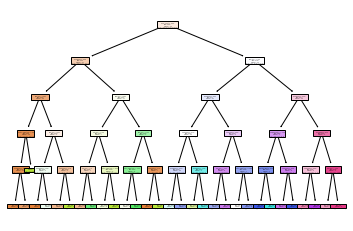

In [84]:
plot_tree(treeG,feature_names = list(dfC.columns),filled=True)
plt.show()

In [85]:
treeG.score(Xc_test,Yc_test)

0.6013071895424836

# Régression

In [86]:
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeRegressor(),param)
treeOpt=tree.fit(Xr_train, Yr_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.079334, Meilleur paramètre = {'max_depth': 5}


In [87]:
treeOpt.score(Xr_test,Yr_test)

0.9350037018979137

In [88]:
Yr_test

755    28.094388
662    39.085118
716    35.448269
448    81.265017
224    22.124650
         ...    
122    27.133897
644    78.363678
711    33.705673
679    67.169332
130    21.937145
Name: Energy, Length: 153, dtype: float64

In [89]:
# prévision de l'échantillon test
y_chap = treeOpt.predict(Xr_test)
# matrice de confusion
y_chap = seuil(y_chap)
Yseuil = seuil(list(Yr_test))
table=pd.crosstab(y_chap,Yseuil)
print(table)

col_0   A   B  C   D   E   F   G
row_0                           
A      32  10  3   0   0   0   0
B       3   9  8   0   0   0   0
C       1   1  5   2   0   0   0
D       0   0  0  13   4   1   0
E       0   0  0   5  10   2   0
F       0   0  0   0   7  19   5
G       0   0  0   0   1   0  12
